In [1]:
%matplotlib qt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcsetup.all_backends

import pyExSi

import LadiskDAQ

In [3]:
acq = LadiskDAQ.NIAcquisition('TestTask')
acq.set_trigger(100, 0, duration=10)

In [4]:
time_array = np.arange(100000) / 10000

signal1 = pyExSi.sine_sweep(time_array, freq_start=1, freq_stop=10)
signal2 = 0.1*np.sin(time_array*2*np.pi*50-0.4*np.pi) + 0.01*np.cos(time_array*2*np.pi*100-np.pi)

signal = np.array([signal1, signal2])

In [5]:
gen = LadiskDAQ.NIGenerator('TestOutput', signal)

In [6]:
plot_layout={
    (0, 0): [0], 
    (0, 1): [1],
    (1, 1): (1, 'fft', 'logy'),
}

# plot_layout = 'default'

ldaq = LadiskDAQ.LDAQ(acq, gen)
ldaq.configure(plot_layout=plot_layout, max_time=1, autoclose=True, nth_point=10)

In [7]:
ldaq.run()

Press "q" to stop measurement.
	Waiting for trigger...stop.


In [7]:
fft = np.fft.rfft(acq.data.T)
freq = np.fft.rfftfreq(acq.data.shape[0], 1/acq.sample_rate)

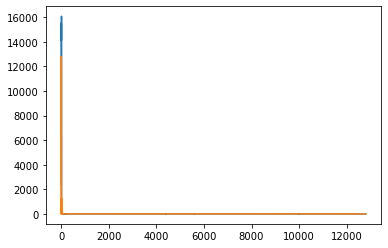

In [8]:
plt.figure()
plt.plot(freq, np.abs(fft).T)

In [7]:
acq.save('test')

In [26]:
%matplotlib qt

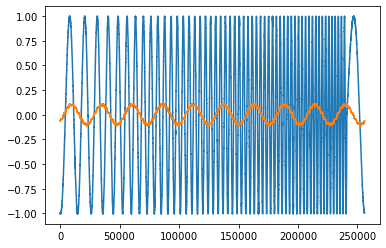

In [9]:
plt.figure()
plt.plot(acq.data)
# plt.plot(signal.T)